# **Image smoothing using a Gaussian filter**
**Image smoothing using a Gaussian filter** is a fundamental image enhancement technique used primarily to blur an image and reduce sharp transitions in intensity. It acts as a lowpass filter, attenuating high-frequency components such as random noise while passing low-frequency components that represent the smooth areas of an image .


### **Core Concept of Gaussian Smoothing**
Unlike simple averaging (box) filters that assign equal weight to every pixel in a neighborhood, the Gaussian filter is a weighted average filter. 
In this method, the influence of a neighboring pixel on the output depends on its distance from the center; specifically, the weights decrease monotonically with distance from the central pixel. This results in a smoother, more natural-looking blur compared to box filters.

### **Mathematical Explanation**
The behavior of the filter is defined by the 2D Gaussian function, which creates a bell-shaped surface.
1. **The Gaussian Function**
For a discrete 2D Gaussian function with zero mean, the expression is typically given as:$$f(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}}$$ Alternatively, it can be simplified in discrete notation as:$$gm, n = e^{-\frac{m^2+n^2}{2\sigma^2}}$$ Where:
$x, y$ (or $m, n$) represent the horizontal and vertical distances from the center of the filter 
$\sigma$ (Standard Deviation) is the "spread" parameter. It controls the extent of the smoothing; a larger $\sigma$ (or variance $\sigma^2$) results in a wider filter and more pronounced blurring.

### **Spatial Domain Implementation (Convolution)**
In the spatial domain, the smoothing process is mathematically achieved through two-dimensional convolution. The image $f(x,y)$ is convolved with a Gaussian kernel $w(x,y)$ to produce the smoothed image $g(x,y)$:$$g(x, y) = f(x, y) * w(x, y)$$To capture the effective shape of the Gaussian curve, the size of the kernel is usually chosen to be approximately $6\sigma \times 6\sigma$.

### **Frequency Domain Implementation (Multiplication)**
Convolution in the spatial domain is equivalent to multiplication in the frequency domain. The image is converted via Fourier Transform ($F$), multiplied by the Gaussian lowpass filter transfer function ($H$), and then converted back via Inverse Fourier Transform:$$G(u, v) = H(u, v)F(u, v)$$ Where the filter transfer function is defined as:$$H(u, v) = e^{-\frac{D^2(u, v)}{2\sigma^2}}$$ ($D(u, v)$ is the distance from the center of the frequency rectangle).
### **Key Advantages of Gaussian Filtering**
**Isotropic (Circularly Symmetric)**: The filter's response is independent of the direction of intensity transitions, ensuring uniform blurring in all radial directions.

**Separability**: A 2D Gaussian kernel is separable, meaning it can be implemented as two successive 1D convolutions (one row-wise, one column-wise). This drastically reduces computational operations from $O(MNn^2)$ to $O(MNn)$ for an $M \times N$ image and $n \times n$ kernel.

**No Ringing**: Unlike "Ideal" lowpass filters, Gaussian filters are guaranteed to produce no ringing artifacts (false oscillations) in the output image.
Noise Reduction: It is highly effective at minimizing the impact of additive white Gaussian noise.



## **Gaussian Filter Implementation** 
### **Overview**
The project uses Python's standard scientific stack: 
- OpenCV for image processing
- NumPy for numerical array operations
- Matplotlib for visualization.


### **Core Concept & Mathematics**
Gaussian smoothing is a weighted average operation where the importance of neighboring pixels decreases as they move further from the center. The behavior is governed by the 2D Gaussian function: 

$$G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}}$$

The standard deviation (σ) acts as a "blur dial"; a higher σ results in a wider filter and more pronounced blurring

## **Project Code**
### **Step 1: Import Required Libraries**
We need three main libraries:

- cv2 (OpenCV): For image loading and built-in filtering functions
- numpy: For manual convolution implementation and array operations
- matplotlib: For displaying images side by side

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Load a real image (using grayscale for technical clarity)
from pathlib import Path
# Try to load an image robustly from the images folder
img_path = Path('images') / 'noisy_1.jpg'
if not img_path.exists():
    candidates = list(Path('images').glob('*'))
    img_path = candidates[0] if candidates else None

if img_path is not None:
    img_in = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
else:
    img_in = None

if img_in is None:
    # Provide a helpful message and fall back to a synthetic image
    print('Warning: could not read any image from images/. Using synthetic test image.')
    img_in = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (256, 1))

# 2. Add White Gaussian Noise to demonstrate denoising effectiveness [10, 11]
mean, std = 0, 50
# Generate Gaussian noise using numpy and add safely to avoid dtype/shape errors
gauss_noise = np.random.normal(mean, std, img_in.shape).astype(np.int16)
noisy_img = img_in.astype(np.int16) + gauss_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

### ***Step 2: Apply Gaussian Smoothing with different kernel sizes and sigma values***

In [6]:
# 3. Apply Gaussian Smoothing with different kernel sizes and sigma values [8, 12]
# Note: Kernel size should be ~6 * sigma and odd [13, 14]
blur_small = cv2.GaussianBlur(noisy_img, (5, 5), 1.0)
blur_large = cv2.GaussianBlur(noisy_img, (11, 11), 3.0)

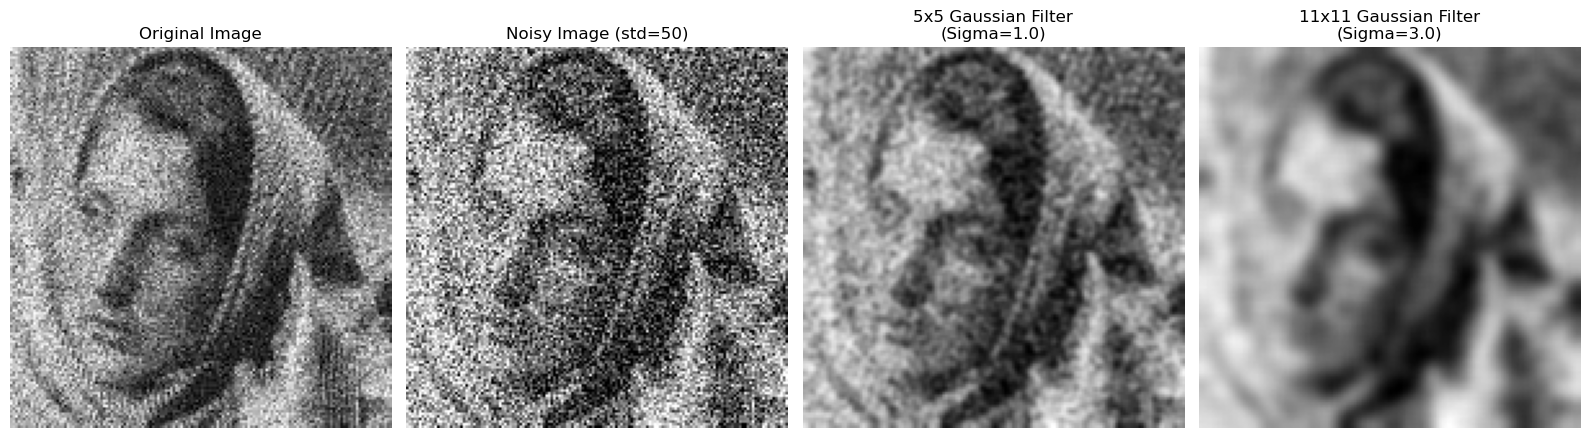

In [9]:
# 4. Display results and comparisons [9, 15]
plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.imshow(img_in, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image (std=50)'), plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(blur_small, cmap='gray')
plt.title('5x5 Gaussian Filter\n(Sigma=1.0)'), plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blur_large, cmap='gray')
plt.title('11x11 Gaussian Filter\n(Sigma=3.0)'), plt.axis('off')

plt.tight_layout()
plt.show()

## **Results and Comparisons**

### **Impact of Noise Reduction**
• *Original vs. Noisy*: The noisy image displays high-frequency "graininess" caused by random intensity jumps between pixels.

• *Smoothing Effect*: Passing the noisy image through Gaussian filters minimizes the impact of this noise. Because Gaussian filters are isotropic, the blurring is perfectly uniform in all directions, avoiding the "squarish" artifacts seen in basic box filters.

### **Comparison of Filter Scales**
• **Kernel Size** (5×5 vs. 11×11): As the kernel size increases, the extent of filtering becomes more aggressive.

• **Detail vs. Denoising:**
    ◦ The small filter (5×5) successfully reduces fine-grain noise while preserving the primary edges of the subject.
    ◦ The large filter (11×11) removes almost all visible noise but results in a significant loss of image detail, making the picture appear very "fuzzy".


### ***Key Observations***
• No Ringing: Unlike "Ideal" filters, the Gaussian output shows no false oscillations or "ghost" lines around edges.
• Computational Speed: In larger implementations, Gaussian kernels are separable, allowing the computer to process rows and columns independently, which is much faster than standard 2D convolutio